In [35]:
# imported libraries
import pandas as pd
import seaborn as sb
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import demoji
import re
import string

In [9]:
df = pd.read_csv('ArasKargo_Tweets.csv')

In [10]:
df.head() # by deafult gives us first 5 rows

,Unnamed: 0,Date,User,Tweet
0,0,2022-09-30 21:56:39+00:00,GzmDuman58,Kargo şirketlerinde başkasının kargosunu alma ...
1,1,2022-09-30 19:46:59+00:00,Eminediyelim,@AtillaOzmumcu @TahsinLtan @vitaminlercom @ara...
2,2,2022-09-30 08:09:31+00:00,PelinZeyno,@araskargo Aldığınız malı çöpe atmak istiyorsa...
3,3,2022-09-29 21:47:23+00:00,Fehmi60461853,taşıdığı kargoyu çorbaya çeviren sorumsuz \n@a...
4,4,2022-09-29 21:47:03+00:00,Fehmi60461853,taşıdığı kargoyu çorbaya çeviren sorumsuz \n@a...


In [11]:
df.rename(columns={'Unnamed: 0':'index'},inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11435 entries, 0 to 11434
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   11435 non-null  int64 
 1   Date    11435 non-null  object
 2   User    11435 non-null  object
 3   Tweet   11435 non-null  object
dtypes: int64(1), object(3)
memory usage: 357.5+ KB


In [13]:
df['wordcount_before_cleaning'] = df['Tweet'].map(lambda x:len(x.split()))

In [14]:
df.head()

,index,Date,User,Tweet,wordcount_before_cleaning
0,0,2022-09-30 21:56:39+00:00,GzmDuman58,Kargo şirketlerinde başkasının kargosunu alma ...,31
1,1,2022-09-30 19:46:59+00:00,Eminediyelim,@AtillaOzmumcu @TahsinLtan @vitaminlercom @ara...,21
2,2,2022-09-30 08:09:31+00:00,PelinZeyno,@araskargo Aldığınız malı çöpe atmak istiyorsa...,17
3,3,2022-09-29 21:47:23+00:00,Fehmi60461853,taşıdığı kargoyu çorbaya çeviren sorumsuz \n@a...,35
4,4,2022-09-29 21:47:03+00:00,Fehmi60461853,taşıdığı kargoyu çorbaya çeviren sorumsuz \n@a...,35


Word Distribution Before cleaning Tweets('@','#','https://...',...)

In [17]:
pd.DataFrame(df['wordcount_before_cleaning'].describe()).T

,count,mean,std,min,25%,50%,75%,max
wordcount_before_cleaning,11435.0,23.007171,9.709365,2.0,15.0,24.0,31.0,47.0


<AxesSubplot: xlabel='wordcount_before_cleaning', ylabel='Count'>

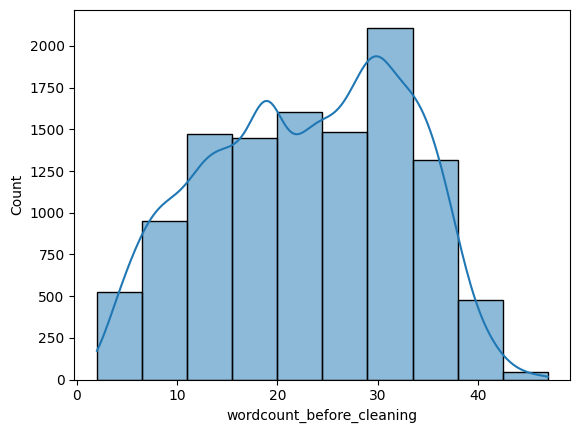

In [21]:
sb.histplot(data=df['wordcount_before_cleaning'],bins=10,kde=True)

Cleaning Tweets

In [22]:
def clean_tweets(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'@\w+|\#','',tweet) # this is for removing # and @ mentions 
    tweet= tweet.translate(str.maketrans("","",string.punctuation))
    tweet = re.sub(r"http\s+|www\S+|https\S+","",tweet,flags=re.MULTILINE) # removing https links 
    tweet = demoji.replace(tweet,"")
    tweet = re.sub('\n',' ',tweet) # remove \n
    return tweet

In [25]:
df['cleanTweets'] = df['Tweet'].map(clean_tweets)

In [26]:
df['wordcount_after_cleaning'] = df['cleanTweets'].map(lambda x:len(x.split()))

In [27]:
df.head()

,index,Date,User,Tweet,wordcount_before_cleaning,cleanedTweets,cleanTweets,wordcount_after_cleaning
0,0,2022-09-30 21:56:39+00:00,GzmDuman58,Kargo şirketlerinde başkasının kargosunu alma ...,31,kargo şirketlerinde başkasının kargosunu alma ...,kargo şirketlerinde başkasının kargosunu alma ...,29
1,1,2022-09-30 19:46:59+00:00,Eminediyelim,@AtillaOzmumcu @TahsinLtan @vitaminlercom @ara...,21,pandeminin başında benim kargomu yan siten...,pandeminin başında benim kargomu yan siten...,17
2,2,2022-09-30 08:09:31+00:00,PelinZeyno,@araskargo Aldığınız malı çöpe atmak istiyorsa...,17,aldığınız malı çöpe atmak istiyorsanız araska...,aldığınız malı çöpe atmak istiyorsanız araska...,16
3,3,2022-09-29 21:47:23+00:00,Fehmi60461853,taşıdığı kargoyu çorbaya çeviren sorumsuz \n@a...,35,taşıdığı kargoyu çorbaya çeviren sorumsuz da...,taşıdığı kargoyu çorbaya çeviren sorumsuz da...,33
4,4,2022-09-29 21:47:03+00:00,Fehmi60461853,taşıdığı kargoyu çorbaya çeviren sorumsuz \n@a...,35,taşıdığı kargoyu çorbaya çeviren sorumsuz da...,taşıdığı kargoyu çorbaya çeviren sorumsuz da...,33


In [28]:
pd.DataFrame(df['wordcount_after_cleaning'].describe()).T

,count,mean,std,min,25%,50%,75%,max
wordcount_after_cleaning,11435.0,21.50739,9.441914,1.0,14.0,22.0,29.0,47.0


In [29]:
df.describe()

,index,wordcount_before_cleaning,wordcount_after_cleaning
count,11435.000000,11435.000000,11435.000000
mean,5717.000000,23.007171,21.507390
std,3301.144499,9.709365,9.441914
min,0.000000,2.000000,1.000000
25%,2858.500000,15.000000,14.000000
50%,5717.000000,24.000000,22.000000
75%,8575.500000,31.000000,29.000000
max,11434.000000,47.000000,47.000000


<AxesSubplot: xlabel='wordcount_after_cleaning', ylabel='Count'>

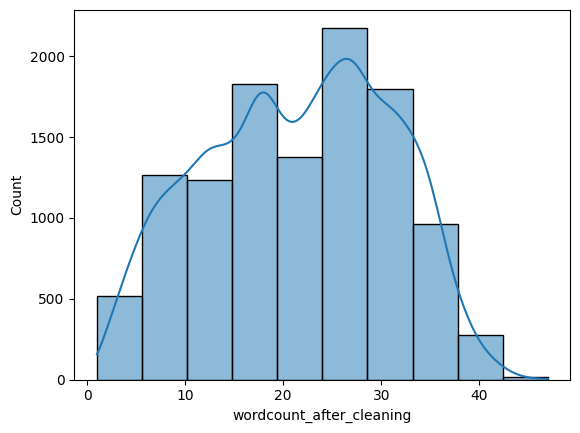

In [30]:
sb.histplot(data=df['wordcount_after_cleaning'],bins=10,kde=True)

In [31]:
df.head()

,index,Date,User,Tweet,wordcount_before_cleaning,cleanedTweets,cleanTweets,wordcount_after_cleaning
0,0,2022-09-30 21:56:39+00:00,GzmDuman58,Kargo şirketlerinde başkasının kargosunu alma ...,31,kargo şirketlerinde başkasının kargosunu alma ...,kargo şirketlerinde başkasının kargosunu alma ...,29
1,1,2022-09-30 19:46:59+00:00,Eminediyelim,@AtillaOzmumcu @TahsinLtan @vitaminlercom @ara...,21,pandeminin başında benim kargomu yan siten...,pandeminin başında benim kargomu yan siten...,17
2,2,2022-09-30 08:09:31+00:00,PelinZeyno,@araskargo Aldığınız malı çöpe atmak istiyorsa...,17,aldığınız malı çöpe atmak istiyorsanız araska...,aldığınız malı çöpe atmak istiyorsanız araska...,16
3,3,2022-09-29 21:47:23+00:00,Fehmi60461853,taşıdığı kargoyu çorbaya çeviren sorumsuz \n@a...,35,taşıdığı kargoyu çorbaya çeviren sorumsuz da...,taşıdığı kargoyu çorbaya çeviren sorumsuz da...,33
4,4,2022-09-29 21:47:03+00:00,Fehmi60461853,taşıdığı kargoyu çorbaya çeviren sorumsuz \n@a...,35,taşıdığı kargoyu çorbaya çeviren sorumsuz da...,taşıdığı kargoyu çorbaya çeviren sorumsuz da...,33


In [32]:
for i in list(df.sample(15, random_state=1).index):
    print(df.loc[i]['cleanTweets'])

araskargo  araskargokargomugetir  5 mayısta gönderimi kargoya verdim ortada yok ve kimseye ulaşamadım  bu size verdiğim son gönderi olacak 
aras kargo kadar berbat bir kargo şirketi görmedim rezaletsiniz araskargo
  yarımca şubesi hep aynı şeyi yapıyor bu kaçıncı gönderici bu şekilde göndermiş diyerek hep aynı yalanı söylüyorlar tüm diğer kargo şirketleri eve teslimat yaparken aras kargo yarımca şubesi gönderilerimize neden haksızca el koyuyor araskargo
balkonumdan dağıtım ofisini gördüğüm kargomu 6 günde tarafıma iletemeyerek ayrı bir yetenek örneği sağlayan şirketinizi tebrik ediyorum   araskargo araskargolavinyaşube seslenseydin hiç olmazsa ben gelir alırdım
araskargo içerisinde serum bulunan soğuk zincirdeki kargoyu dışarıda beklerken saat 1530’u geçtiği için geri çevirdi sağlık gerçekten zerre umrunuzda değil
her zaman oldugu gibi haksizliga cozum yok araskargo paketimi kaybetti ve sesi solugu cikmiyor
kargo araca yüklendi kargo araçtan indirildi kargo araca yüklendi kargo araçtan

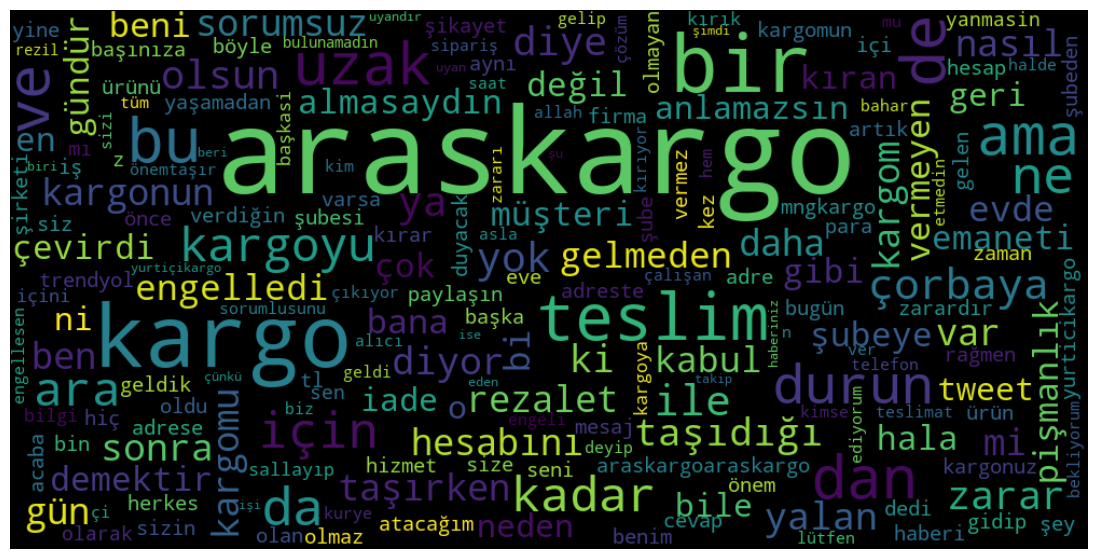

In [36]:
# ploting word cloud

allWords = ''.join([twts for twts in df['cleanTweets']])
wordCloud = WordCloud(width= 1000,height=500,random_state=35,max_font_size=110,collocations=False).generate(allWords)

figure = plt.figure(figsize=(15,7))
plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()